In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('infolimpioavanzadoTarget.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

In [4]:
# Summary statistics
print(df.describe())

             open        high         low       close    adjclose  \
count  134.000000  134.000000  134.000000  134.000000  134.000000   
mean    15.000187   15.323828   14.678799   14.981716   14.981716   
std      1.011206    1.025920    1.010765    0.993556    0.993556   
min     13.120000   13.550000   12.780000   12.860000   12.860000   
25%     14.105000   14.402500   13.878500   14.180000   14.180000   
50%     14.985000   15.420000   14.595000   14.990000   14.990000   
75%     15.747500   16.070000   15.530000   15.742500   15.742500   
max     17.799999   18.309999   17.620001   17.760000   17.760000   

             volume  RSIadjclose15  RSIvolume15  RSIadjclose25  RSIvolume25  \
count  1.340000e+02     119.000000   119.000000     109.000000   109.000000   
mean   1.116963e+05      47.507285    49.812155      48.386046    49.856924   
std    1.029078e+05      10.746692     5.422005       4.860806     4.017006   
min    3.440000e+04       7.689906    40.924816      35.631228

In [5]:
# Check for missing values
print(df.isnull().sum())

date                 0
open                 0
high                 0
low                  0
close                0
                    ..
stochastic-kd-15    17
volumenrelativo      1
diff                 1
INCREMENTO           1
TARGET               1
Length: 1285, dtype: int64


In [6]:
# Data types of each column
print(df.dtypes)

date                 object
open                float64
high                float64
low                 float64
close               float64
                     ...   
stochastic-kd-15    float64
volumenrelativo     float64
diff                float64
INCREMENTO          float64
TARGET              float64
Length: 1285, dtype: object


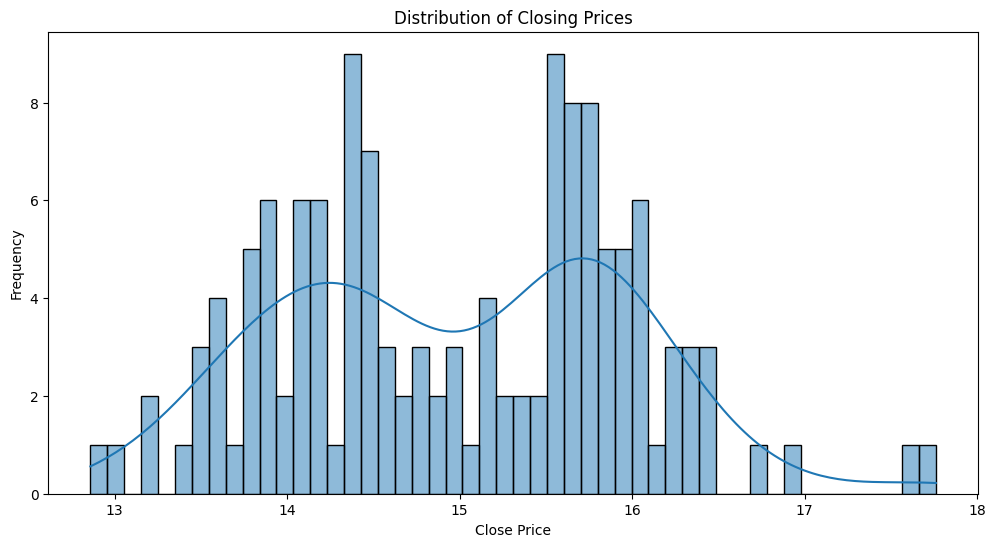

In [7]:
# Visualize the distribution of key columns
plt.figure(figsize=(12, 6))
sns.histplot(df['close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

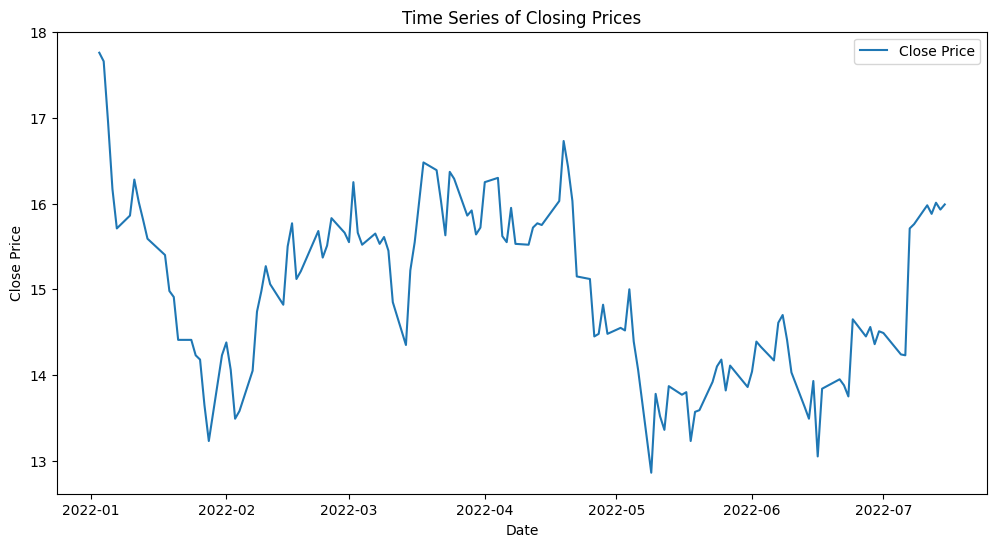

In [8]:
# Time series plot of closing prices
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['date']), df['close'], label='Close Price')
plt.title('Time Series of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

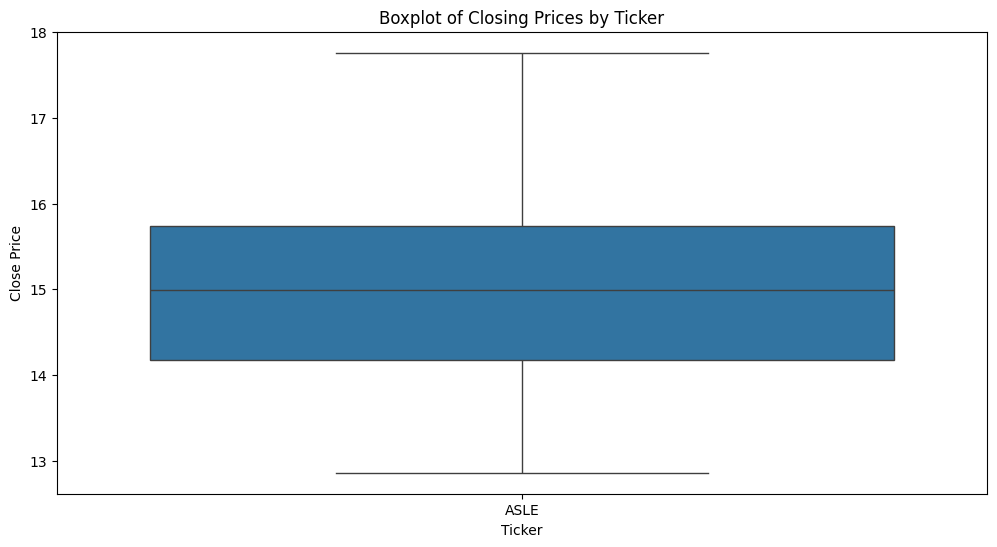

In [11]:
# Boxplot of closing prices by ticker
plt.figure(figsize=(12, 6))
sns.boxplot(x='ticker', y='close', data=df)
plt.title('Boxplot of Closing Prices by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Close Price')
plt.show()

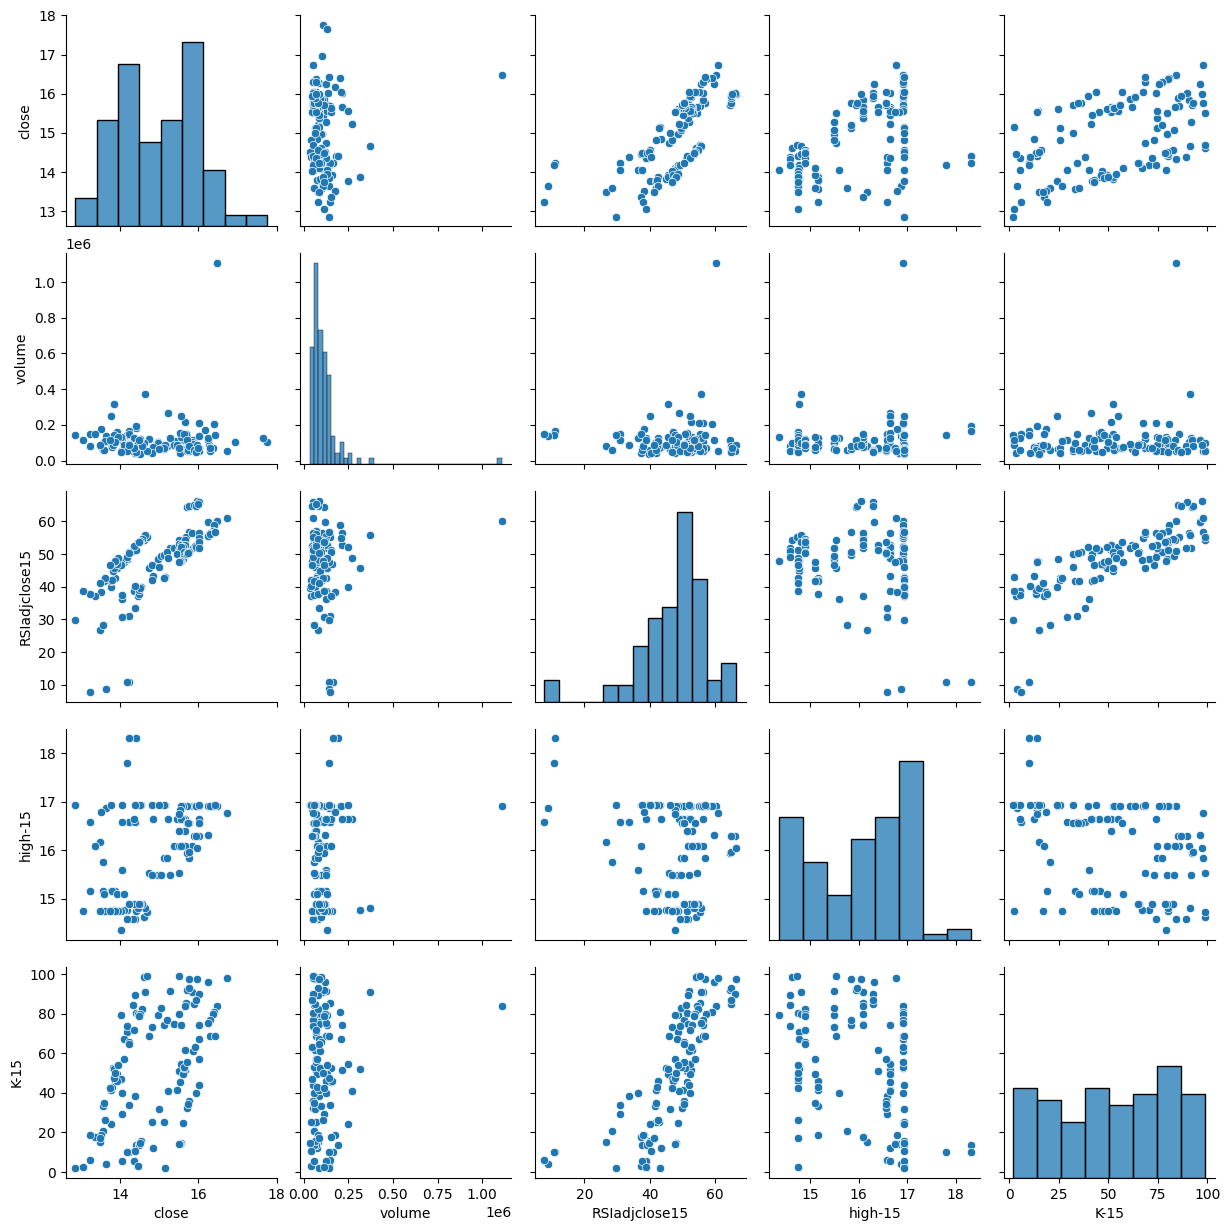

In [12]:
# Pairplot to visualize relationships between variables
sns.pairplot(df[['close', 'volume', 'RSIadjclose15', 'high-15', 'K-15']])
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Selecting features and target variable
features = ['open', 'high', 'low', 'volume', 'RSIadjclose15', 'RSIvolume15', 'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15', 'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO']
target = 'close'

In [15]:
# Splitting the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Initializing and training the model
model = LinearRegression()
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X_train_imputed = imputer.fit_transform(X_train)
model.fit(X_train_imputed, y_train)

LinearRegression()

In [19]:
# Making predictions
# Impute missing values in X_test using the same imputer fitted on X_train
X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)

In [20]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [21]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.031139839014446682
R-squared: 0.9549852635032015
